In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

El objetivo del modelo para esta base de datos, consistirá en predecir la cantidad diaria de vacunaciones diarias (daily_vaccinations) en funcion del tiempo. 

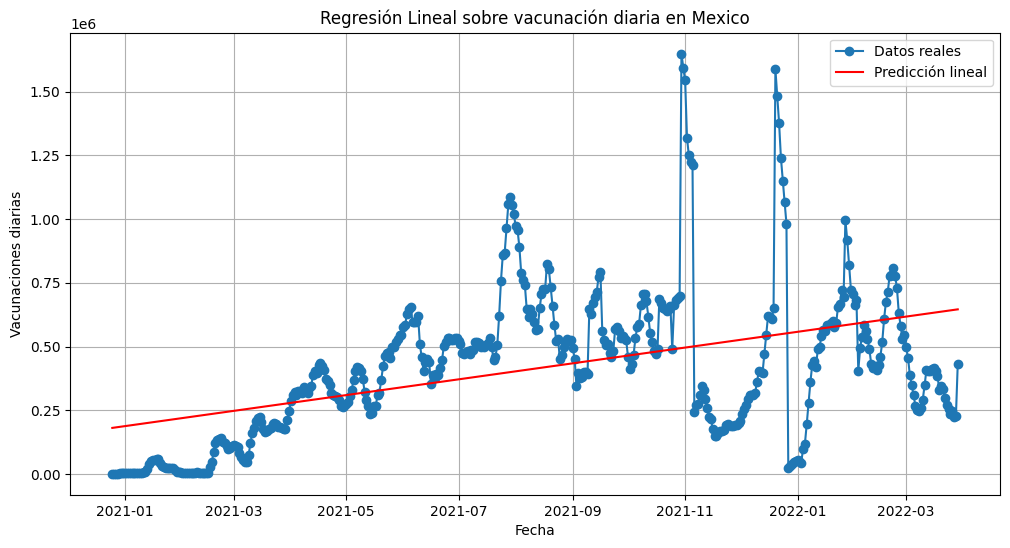

🔮 Predicciones para los próximos días:
        date  predicted_daily_vaccinations
0 2022-03-30                        646863
1 2022-03-31                        647876
2 2022-04-01                        648889
3 2022-04-02                        649901
4 2022-04-03                        650914
5 2022-04-04                        651927
6 2022-04-05                        652940
7 2022-04-06                        653952
8 2022-04-07                        654965
9 2022-04-08                        655978


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar el archivo
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')

# Filtrar por país (Mexico)
country = 'Mexico'
df_country = df[df['country'] == country][['date', 'daily_vaccinations']].dropna()

# Convertir fechas a números para regresión
df_country['date'] = pd.to_datetime(df_country['date'])
df_country['date_ordinal'] = df_country['date'].map(pd.Timestamp.toordinal)

# Datos para el modelo
X = df_country[['date_ordinal']]
y = df_country['daily_vaccinations']

# Entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir sobre los datos existentes
y_pred = model.predict(X)

# Mostrar el ajuste
plt.figure(figsize=(12,6))
plt.plot(df_country['date'], y, label='Datos reales', marker='o')
plt.plot(df_country['date'], y_pred, label='Predicción lineal', color='red')
plt.title(f"Regresión Lineal sobre vacunación diaria en {country}")
plt.xlabel("Fecha")
plt.ylabel("Vacunaciones diarias")
plt.legend()
plt.grid()
plt.show()

# Predicción para fechas futuras (ej. próximos 10 días)
future_days = 10
last_date = df_country['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_ordinals)

# Mostrar predicciones
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_daily_vaccinations': future_predictions.astype(int)
})

print("🔮 Predicciones para los próximos días:")
print(future_df)
